# Advertisement Success Dataset

In [50]:
import numpy as np
import pandas as pd
import os 

В качестве перового датасета я выбрала датасет "Advertisement Success Dataset". Он включает разные характеристики рекламных кампаний, а именно:

    1. ее идентификатор (id)
    2. параметры, описывающие потенциальный сегмент заинтересованных в ней лиц:
        * гендер (targeted_sex: Male/ Female)
        * семейное положение (relationship_status: Married/ Never-Married/ Divorced/ Separated/ Widowed)
    3. сфера (industry: Auto/ Pharma/ Entertainment/ Political/ ClassAction/ Other)
    4. жанр (genre: Comedy/ Drama/ Infomercial/ Direct/ Other)
    3. средняя продолжительность(кол-во часов в неделе)
    4. эфирное время (airtime: Morning/ Daytime/ Primetime)
    5. страна (airlocation: more than 40 countries)
    6. рейтинги (ratings: 0-1)
    7. дороговизна рекламы (expensive: Low/ High/ Medium)
    8. гарантия возврата средств (money_back_garantee: Yes/ No)
    9. чистая прибыль (netgain: true/ false)

Об успехе рекламной кампании можно судить исходя из признака "чистая прибыль". Именно этот признак я взяла в качестве целевого. Таким образом, этот датасет будем рассматривать в качетсве обучающего для будущей модели.
Модель будет классифицировать рекламу на успешную (netgain = true) и неуспешную (netgain = false) по выбранному целевому признаку.

Рассмотрим данные поближе.

In [51]:
ad_suc_file_path = '../input/advertsuccess/Train.csv'
data = pd.read_csv(ad_suc_file_path)
data.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [52]:
data.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

# Описание данных

In [53]:
data.describe(include='all')

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
count,26048.000000,26048,26048,26048,26048,26048.000000,26048,26048,26048.000000,26048,26048,26048
unique,NaN,7,6,5,2,NaN,3,42,NaN,3,2,2
top,NaN,Married-civ-spouse,Pharma,Comedy,Male,NaN,Primetime,United-States,NaN,Low,Yes,False
freq,NaN,11844,10339,22258,17245,NaN,15652,23250,NaN,15693,13073,19853
mean,16268.744779,NaN,NaN,NaN,NaN,40.294111,NaN,NaN,0.038716,NaN,NaN,NaN
std,9413.578020,NaN,NaN,NaN,NaN,12.479457,NaN,NaN,0.075852,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,8095.750000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,0.027465,NaN,NaN,NaN
50%,16237.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,0.027465,NaN,NaN,NaN
75%,24413.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,0.027465,NaN,NaN,NaN


В данных нет пропусков, т.к. признак count имеет одинаковое значение для всех колонок (характеристик). Часто фигурирует значение NaN из-за того, что для числовых признаков вычисляются самое распространенное значение (top), его частота (freq) и число уникальных признаков (unique) или же для объектных признаков (строки/ временные метки) вычисляются среднее значение (mean), среднеквадратичное значение (std), минимум (min), макисмум (max) и процентили (25, 50, 75%).

Попробуем это исправить.

In [54]:
data.describe()

,id,average_runtime(minutes_per_week),ratings
count,26048.000000,26048.000000,26048.000000
mean,16268.744779,40.294111,0.038716
std,9413.578020,12.479457,0.075852
min,2.000000,1.000000,0.000000
25%,8095.750000,40.000000,0.027465
50%,16237.000000,40.000000,0.027465
75%,24413.500000,45.000000,0.027465
max,32561.000000,99.000000,1.000000


In [55]:
data.describe(include=['O'])

,realtionship_status,industry,genre,targeted_sex,airtime,airlocation,expensive,money_back_guarantee
count,26048,26048,26048,26048,26048,26048,26048,26048
unique,7,6,5,2,3,42,3,2
top,Married-civ-spouse,Pharma,Comedy,Male,Primetime,United-States,Low,Yes
freq,11844,10339,22258,17245,15652,23250,15693,13073


Найдем рекламу комедийного жанра, которая принесла прибыль и считается успешной.

In [56]:
data_x = data[['genre', 'netgain']]
data_x.loc[(data.netgain == True)]
#data[['genre','netgain']]

,genre,netgain
4,Comedy,True
17,Comedy,True
19,Comedy,True
21,Comedy,True
27,Comedy,True
...,...,...
26010,Comedy,True
26018,Comedy,True
26021,Comedy,True
26043,Comedy,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eb7e34cc0>,
      dtype=object)

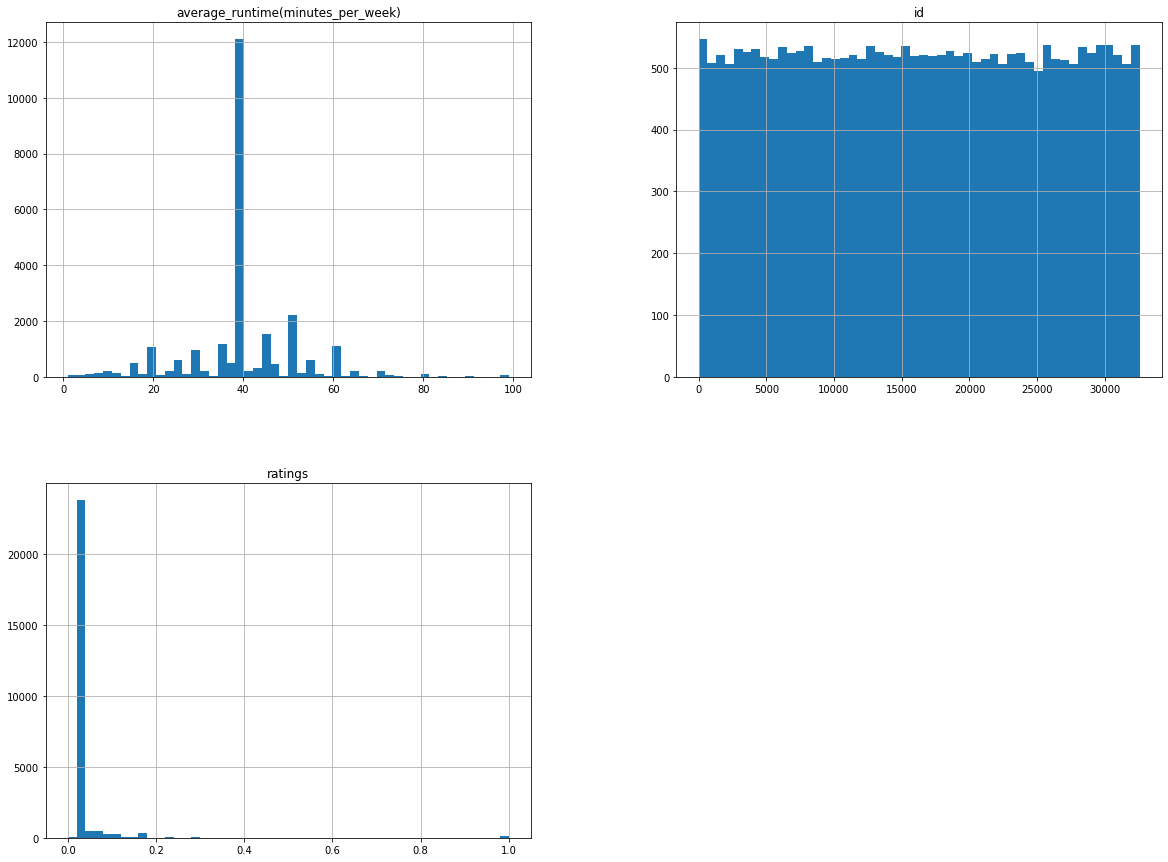

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
data[['id', 'average_runtime(minutes_per_week)', 'ratings']].hist(bins=50,figsize=(20,15))
#imp_data.hist(bins=50,figsize=(20,15))
#plt.show()

Попробую использовать в качестве модели DecisionTreeRegressor из sklearn.tree.
Для этого выберем числовые признаки, которые имеются. Целевым признаком будет 'ratings'. 

In [58]:
data['ratings'].min(),data['ratings'].max()

(0.0, 1.0)

In [59]:
features1 = ['average_runtime(minutes_per_week)']
X1 = data[features1]
#y = pd.get_dummies(data.netgain)
y1 = data.ratings

In [60]:
from sklearn.model_selection import train_test_split
train_X1, val_X1, train_y1, val_y1 = train_test_split(X1, y1, random_state=1)
print(len(train_X1), "train +", len(val_X1), "test")
train_X1.head()

19536 train + 6512 test


,average_runtime(minutes_per_week)
943,45
21724,40
7926,45
296,50
9197,45


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

as_model1 = DecisionTreeRegressor(random_state=1)
as_model1.fit(train_X1, train_y1)
val_predictions1 = as_model1.predict(val_X1)
as_mae1 = mean_absolute_error(val_predictions1, val_y1)

print(val_predictions1[0:5])
print(val_y1.head().values)
as_mae1 = mean_absolute_error(val_predictions1, val_y1)
print("Validation MAE when not specifying max_leaf_nodes: ", as_mae1)

[0.03416728 0.03416728 0.03486541 0.03416728 0.03416728]
[0.02746467 0.02746467 0.02746467 0.02746467 0.02746467]
Validation MAE when not specifying max_leaf_nodes:  0.020375463948235858


Если учесть, что признак 'ratings' принимает значения от 0 до 1, то среднее значение ошибки небольшое.
Чтобы еще уменьшить ее значение, попробуем найти оптимальную высоту дерева решений.

In [62]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
scores = { leaf_size: get_mae(leaf_size, train_X1, val_X1, train_y1, val_y1) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)
print("Best tree size:", best_tree_size)
print(scores)

Best tree size: 5
{5: 0.020288794580862423, 25: 0.020399268859370507, 50: 0.020376584219945235, 100: 0.020375463948235858, 250: 0.020375463948235858, 500: 0.020375463948235858}


Попробуем рассмотреть количество листьев в интервале [2:6].

In [63]:
candidate_max_leaf_nodes = [2, 3, 4, 5]
scores = { leaf_size: get_mae(leaf_size, train_X1, val_X1, train_y1, val_y1) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)
print("Best tree size:", best_tree_size)
print(scores)

Best tree size: 5
{2: 0.02052956228691037, 3: 0.020429604019452447, 4: 0.020394812540066233, 5: 0.020288794580862423}


Оптимальное количество листьев равно 5.
Построим модель с учетом количества листьев и сравним среднее значение ошибки с ранее найденным. 

In [64]:
as_model2 = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)
as_model2.fit(train_X1, train_y1)
val_predictions2 = as_model2.predict(val_X1)
as_mae2 = mean_absolute_error(val_predictions2, val_y1)
print(val_predictions2[0:5])
print(val_y1.head().values)
print("Validation MAE for best value of max_leaf_nodes: ", as_mae2)
print("The difference between MAE1 and MAE2: ", as_mae1 - as_mae2)

[0.03497381 0.03497381 0.03497381 0.03497381 0.03497381]
[0.02746467 0.02746467 0.02746467 0.02746467 0.02746467]
Validation MAE for best value of max_leaf_nodes:  0.020288794580862423
The difference between MAE1 and MAE2:  8.666936737343478e-05


Небольшое среднее значение ошибки связано с тем, что в тестовых и обучающих данных значения признака 'ratings' сконцентрированы и неравномерны на (0, 1). Они почти идиентичны (это можно видеть из графика).

Тем не менее, проверим обе модели на тестовом датасете и сравним полученные результаты.

In [65]:
ad_suc_file_path = '../input/advertsuccess/Test.csv'
test_data = pd.read_csv(ad_suc_file_path)
test_data.head()


,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,1,Widowed,Auto,Comedy,Female,10,Daytime,United-States,0.027465,Low,No
1,4,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.056262,High,Yes
2,5,Divorced,Entertainment,Comedy,Female,50,Morning,United-States,0.027465,Low,No
3,9,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,No
4,10,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,Low,Yes


Посмотрим распределения численных признаков в тестовом датасете.

In [66]:
test_data.describe()

,id,average_runtime(minutes_per_week),ratings
count,6513.000000,6513.000000,6513.000000
mean,16330.013358,40.568095,0.039084
std,9344.526074,12.575851,0.077900
min,1.000000,1.000000,0.000000
25%,8364.000000,40.000000,0.027465
50%,16437.000000,40.000000,0.027465
75%,24444.000000,45.000000,0.027465
max,32560.000000,99.000000,1.000000


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ebcc5fc88>,
      dtype=object)

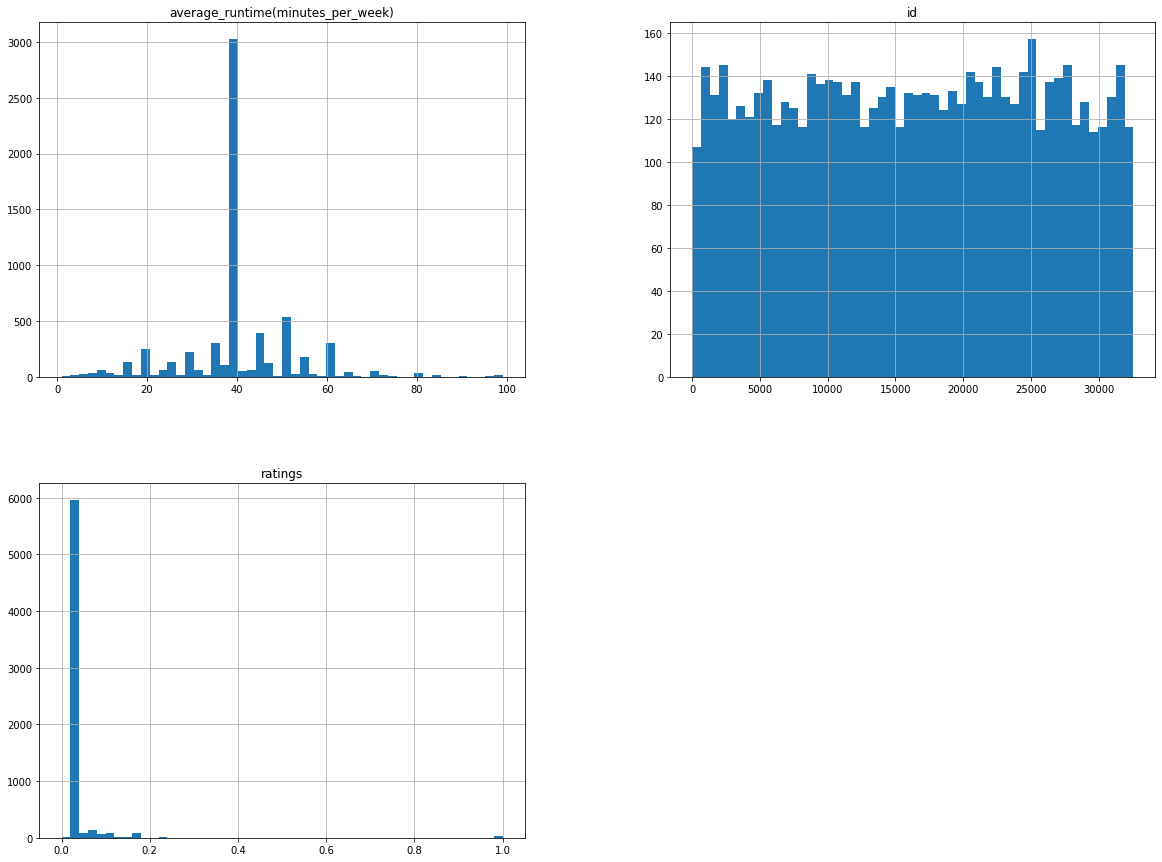

In [67]:
%matplotlib inline
test_data[['id', 'average_runtime(minutes_per_week)', 'ratings']].hist(bins=50,figsize=(20,15))

In [68]:
val_X1 = test_data[features1]
val_predictions1 = as_model1.predict(val_X1)
print(val_predictions1[0:5])

val_predictions2 = as_model2.predict(val_X1)
print(val_predictions2[0:5])
as_mae2 = mean_absolute_error(val_predictions1, val_predictions2)
print("The difference between 2 models on test_data: ", as_mae2)

[0.03287532 0.03416728 0.04808138 0.03416728 0.03416728]
[0.03497381 0.03497381 0.05144743 0.03497381 0.03497381]
The difference between 2 models on test_data:  0.0036384516663117345


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

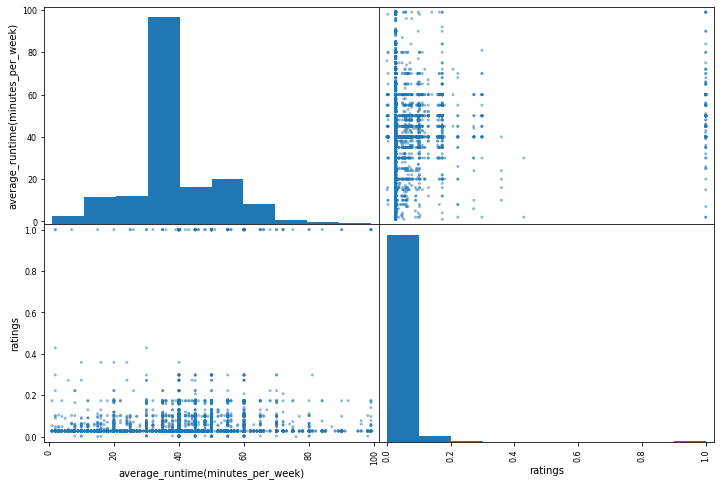

In [69]:
from pandas.plotting import scatter_matrix
attributes = ['average_runtime(minutes_per_week)', 'ratings'] 
scatter_matrix(data[attributes], figsize=(12, 8));

Предыдущая модель решала не совсем ту задачу, которая стояла изначально.
Теперь попробуем включить в обучающую выборку не только численные признаки, но и категориальные. Их, как оказалось, намного больше в этом датасете. В качетсве целевого признака возьмем булевский признак "наличие прибыли".

Сначала сделаем ряд преобразований в датасете, чтобы построить графики зависимостей всех признаков. Преобразуем категориальные признаки в числовые.

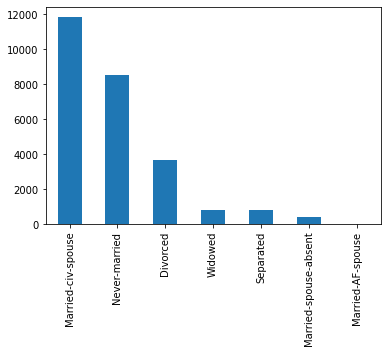

In [70]:
num_data = data.copy(deep=True)
num_data['realtionship_status'].value_counts().plot.bar()
    

Из графика видно, что категориальный признак 'relationship_status' принимает 7 значений.

Преобразуем эти значения в численные.

In [71]:
nv = 0
for value in num_data.realtionship_status.unique():
    num_data.loc[num_data['realtionship_status'] == value, 'realtionship_status'] = nv
    nv +=1
num_data.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,0,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,1,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,2,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,3,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,1,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


С остальными категориальными признаками необходимо сделать то же самое.

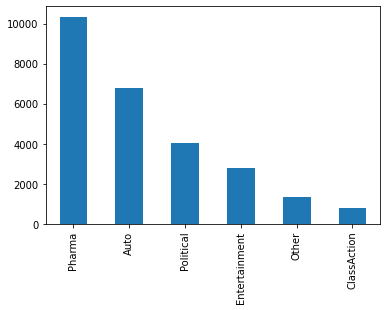

In [72]:
num_data['industry'].value_counts().plot.bar()

In [73]:
#nv = 0
for value in num_data.industry.unique():
    num_data.loc[num_data['industry'] == value, 'industry'] = nv
    nv +=1

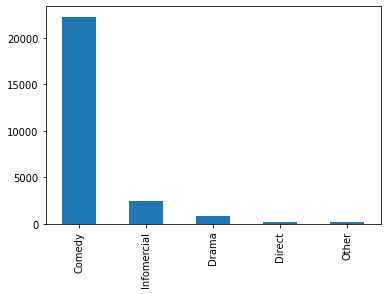

In [74]:
num_data['genre'].value_counts().plot.bar()

In [75]:
#nv = 0
for value in num_data.genre.unique():
    num_data.loc[num_data['genre'] == value, 'genre'] = nv
    nv +=1

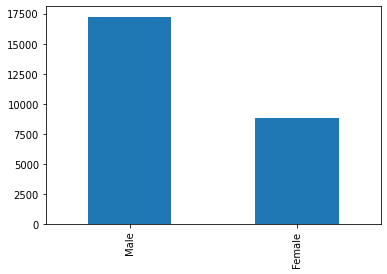

In [76]:
num_data['targeted_sex'].value_counts().plot.bar()

In [77]:
num_data.loc[num_data['targeted_sex'] == 'Male', 'targeted_sex'] = 0
num_data.loc[num_data['targeted_sex'] == 'Female', 'targeted_sex'] = 1

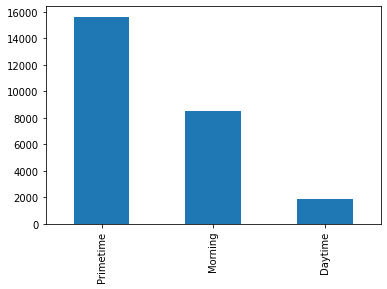

In [78]:
num_data['airtime'].value_counts().plot.bar()

In [79]:
#nv = 0
for value in num_data.airtime.unique():
    num_data.loc[num_data['airtime'] == value, 'airtime'] = nv
    nv +=1

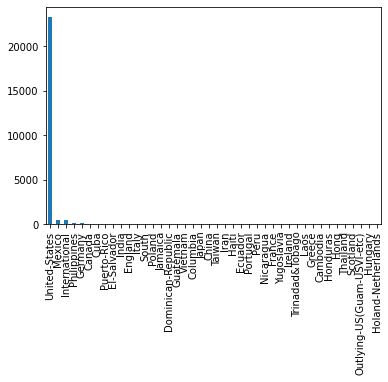

In [80]:
num_data['airlocation'].value_counts().plot.bar()

In [81]:
#nv = 0
for value in num_data.airlocation.unique():
    num_data.loc[num_data['airlocation'] == value, 'airlocation'] = nv
    nv +=1

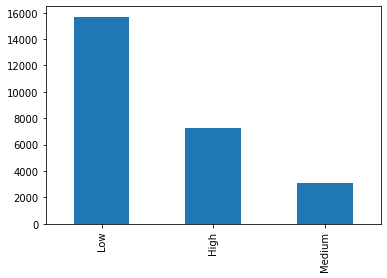

In [82]:
num_data['expensive'].value_counts().plot.bar()

In [83]:
#nv = 0
for value in num_data.expensive.unique():
    num_data.loc[num_data['expensive'] == value, 'expensive'] = nv
    nv +=1

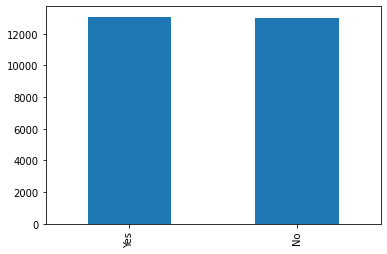

In [84]:
num_data['money_back_guarantee'].value_counts().plot.bar()

In [85]:
num_data.loc[num_data['money_back_guarantee'] == 'Yes', 'money_back_guarantee'] = 1
num_data.loc[num_data['money_back_guarantee'] == 'No', 'money_back_guarantee'] = 0
num_data.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,0,7,13,0,45,18,21,0.027465,63,0,False
1,31593,1,8,13,0,45,18,21,0.027465,64,0,False
2,5681,2,9,13,1,45,18,21,0.027465,63,1,False
3,15491,3,10,14,1,40,18,21,0.027465,64,0,False
4,23587,1,8,13,0,48,18,21,0.027465,63,0,True


Наконец, сделаем целевой признак численным.

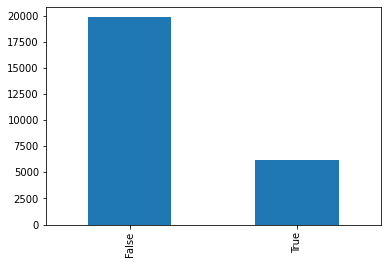

In [86]:
num_data['netgain'].value_counts().plot.bar()

In [87]:
num_data.loc[num_data['netgain'] == True, 'netgain'] = 1
num_data.loc[num_data['netgain'] == False, 'netgain'] = 0
num_data.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,0,7,13,0,45,18,21,0.027465,63,0,0
1,31593,1,8,13,0,45,18,21,0.027465,64,0,0
2,5681,2,9,13,1,45,18,21,0.027465,63,1,0
3,15491,3,10,14,1,40,18,21,0.027465,64,0,0
4,23587,1,8,13,0,48,18,21,0.027465,63,0,1


In [88]:
y = num_data.netgain
features = ['industry', 'average_runtime(minutes_per_week)', 'airtime', 'airlocation', 'ratings']
X = num_data[features]
#oheX = pd.get_dummies(X)
#ohey = pd.get_dummies(y)

Разобьем данные на тренировочные и тестовые.

In [89]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
print(len(train_X), "train +", len(val_X), "test")

19536 train + 6512 test


Будем в этот раз использовать алгоритм RandomForestRegressor() из sklearn.ensemble.

In [90]:
from sklearn.ensemble import RandomForestRegressor
as_model = RandomForestRegressor()
#as_model = DecisionTreeRegressor()
as_model.fit(train_X, train_y)
val_predictions = as_model.predict(val_X)

Полученный вектор значений преобразуем в бинарный вид. Если значение >= 0.5, то будем считать его True (1), в обратном случае False (0).

In [91]:
def back_to_binary(val_predictions):
    for i in range(val_predictions.size):
        if val_predictions[i] >= 0.5:
            val_predictions[i] = 1
        else:
            val_predictions[i] = 0

In [92]:
back_to_binary(val_predictions)
as_mae = mean_absolute_error(val_predictions, val_y)
print(val_predictions[0:5])
print(val_y.head().values)
print("Validation MAE: ", as_mae)

[0. 0. 0. 0. 0.]
[0 0 0 0 0]
Validation MAE:  0.18826781326781328


Проверка модели на всем датасете.

In [93]:
val_predictions = as_model.predict(X)
back_to_binary(val_predictions)
as_mae = mean_absolute_error(val_predictions, y)
print(val_predictions[0:5])
print(val_y.head().values)
print("Validation MAE: ", as_mae)

[0. 1. 0. 0. 1.]
[0 0 0 0 0]
Validation MAE:  0.1689573095823096


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

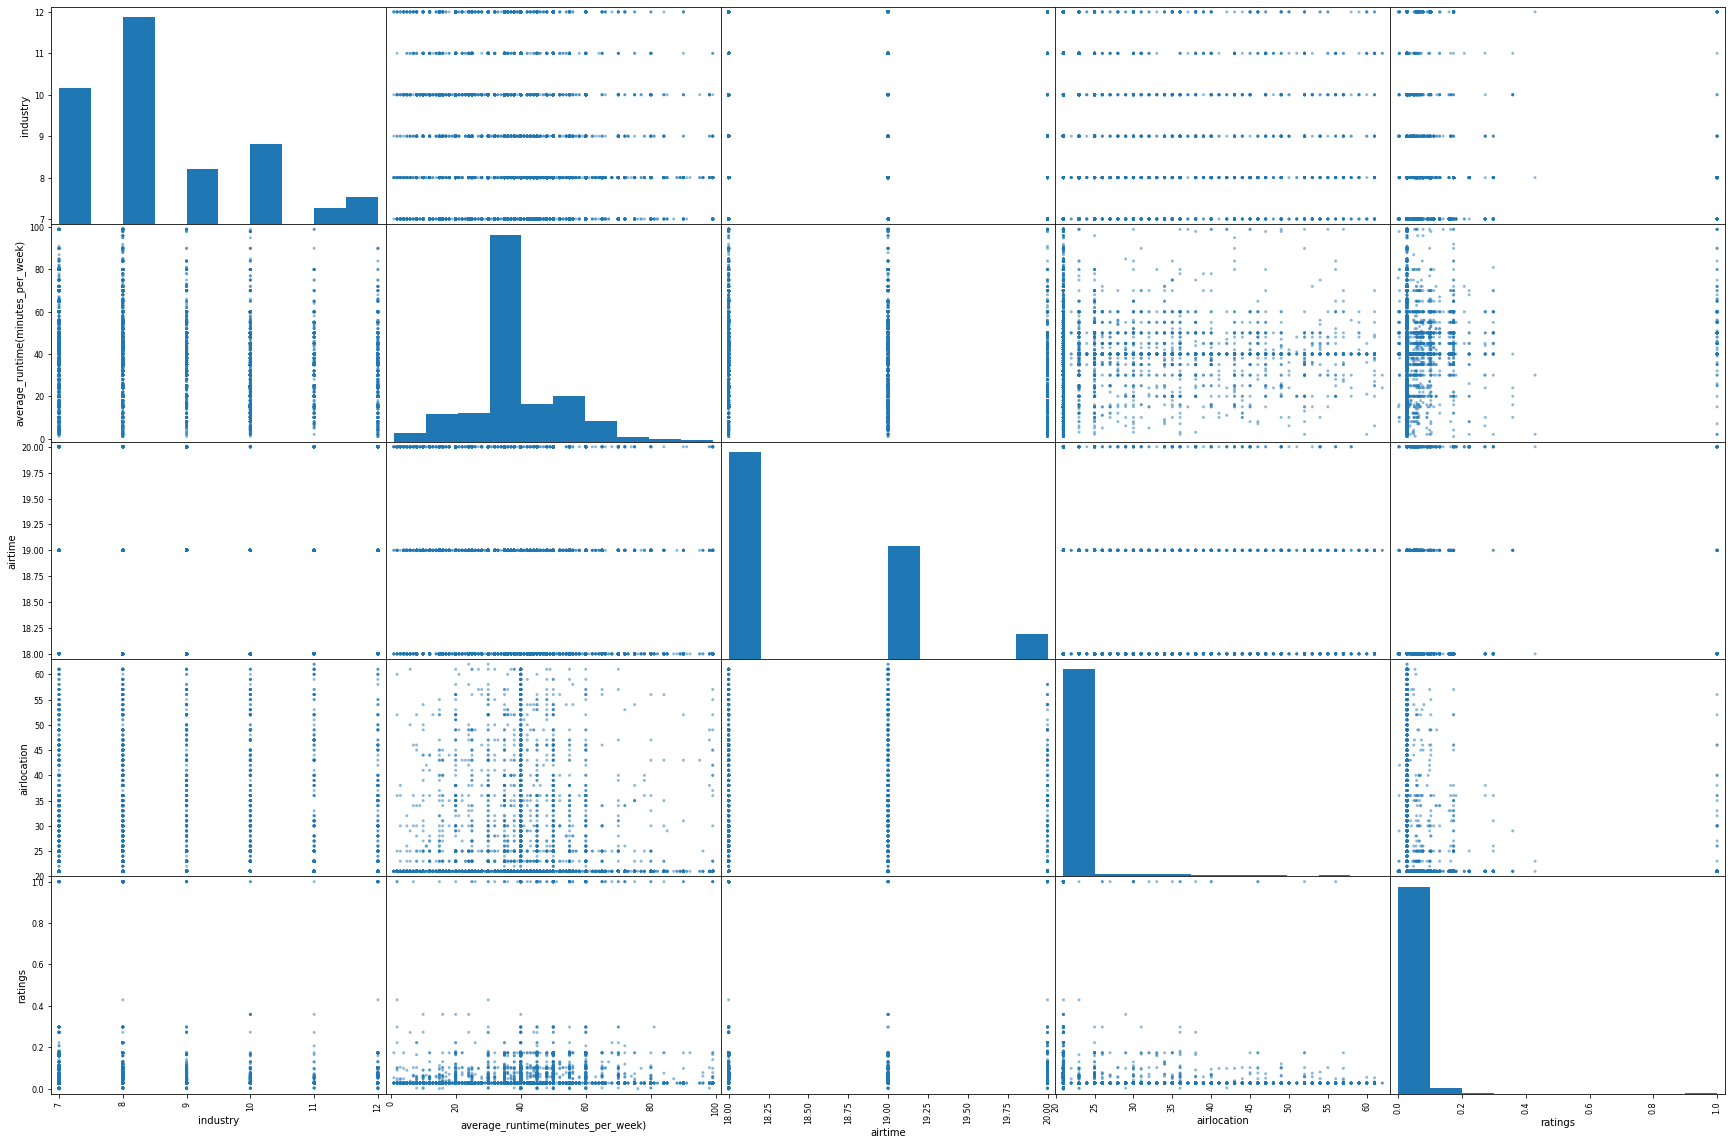

In [94]:
from pandas.plotting import scatter_matrix
attributes = features
scatter_matrix(num_data[attributes], figsize=(30, 20));

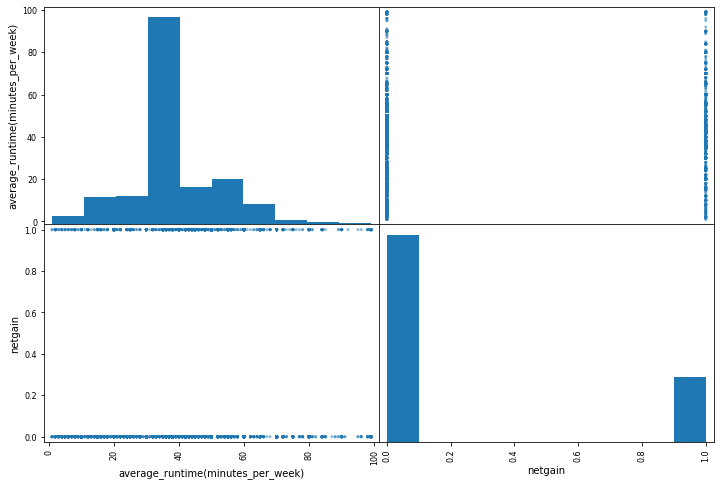

In [95]:
attributes = ['average_runtime(minutes_per_week)', 'netgain']
scatter_matrix(num_data[attributes], figsize=(12, 8));

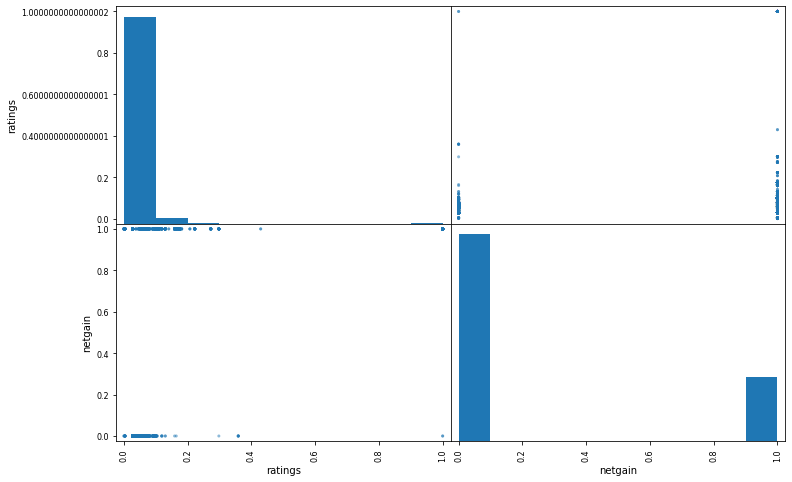

In [96]:
attributes = ['ratings', 'netgain']
scatter_matrix(num_data[attributes], figsize=(12, 8));

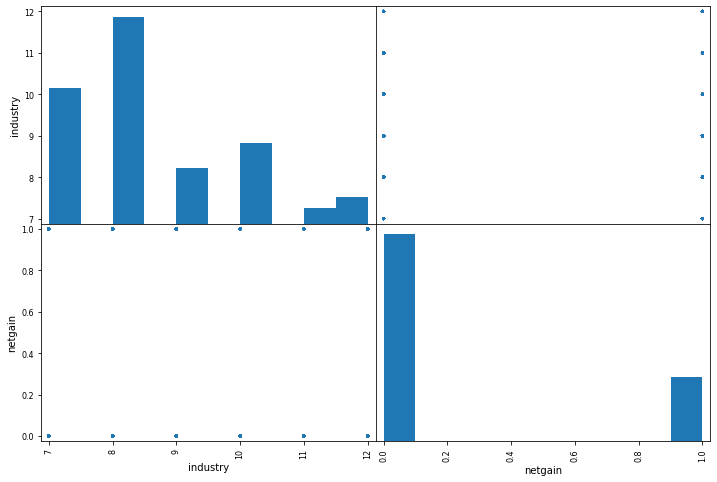

In [97]:
attributes = ['industry', 'netgain']
scatter_matrix(num_data[attributes], figsize=(12, 8));

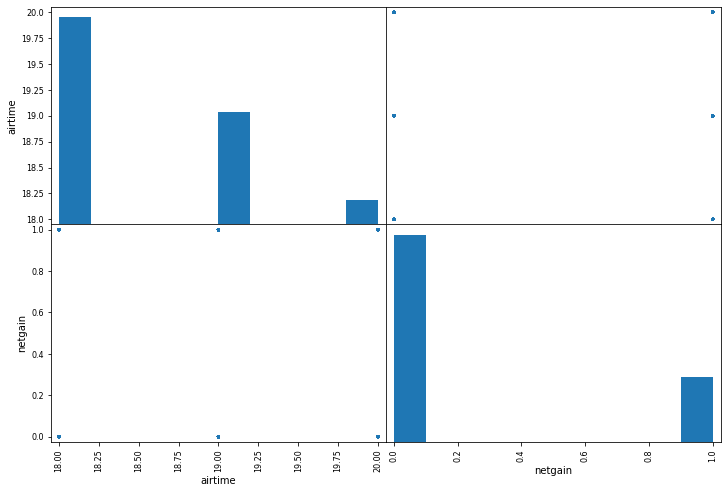

In [98]:
attributes = ['airtime', 'netgain']
scatter_matrix(num_data[attributes], figsize=(12, 8));

По графикам видно, что почти все категориальные признаки имеют дискретные значения.
Опытным путем я определила оптимальный набор признаков, при которых среднее значение ошибок достигает минимального значения (0.16). Этот набор включает такие признаки, как сфера ('industry'), средняя продолжительность трансляции ('average_runtime(minutes_per_week)'), эфирное время ('airtime'), страна ('airlocation'), рейтинги ('ratings').
Именно на основании этих признаков модель наилучшим образом предсказывает принесет ли реклама прибыль, или же нет.

# Проблемы, с которыми я стокнулась

Я выбрала датасет "Advertisement Success Dataset" и выделила целевой признак — "чистая прибыль", который может принимать значения True и False. Соответсвенно, моей задачей стало определение успеха или неуспеха рекламной компании согласно наличию или отсутствию чистой прибыли. Далее, я рассмотрела все представленные признаки подробнее — убедилась, что в данных нет пропусков и нулевых значений. Также я обнаружила, что большинство признаков, представленных в датасете, являются категориальными, включая выбранный мной целевой признак. Эти признаки принимают дискретные значения.

В связи с этим я немного изменила поставленную задачу и решила обучить модель по численному признаку — "средняя продолжительность трансляции в неделю", и в качетсве целевого признака выбрать признак "рейтинги". В принципе, этот признак тоже влияет на успешность/ провал рекламной компании.
Результат оказался хорошим, среднее значение ошибки составило 2%, но это было связано с тем, что большая часть рейтингов в обучающем и тестовом наборах примерно совпадала (из графика видно, что она колеблется от 0 до 0.3).

Чтобы вернуться к первоначальной задаче, я представила все категориальные признаки в виде числовых. Некоторые из них, включая целевой, были бинарными, большинство принимало счетное число значений, самое большое из которых 42 (страна). Модель строилась по новому датасету. Я построила зависимости всех признаков от целевого и опытным путем определила самые значимые признаки, необходимые для обучения модели. Таким образом, среднее значение ошибки для решение первоначальной задачи = 0.17. Это около 17%.
